In [1]:
import sys

sys.path.insert(0, '..')

## Setup the model area

In [2]:
from morpheus.project.types.discretization import SpatialDiscretization
from morpheus.project.types.discretization.spatial import Rotation, Grid, Crs
from morpheus.project.types.geometry import Polygon, LineString

polygon = Polygon(
  type='Polygon',
  coordinates=[[
    (13.92, 50.964),
    (13.92, 50.966),
    (13.925, 50.966),
    (13.925, 50.964),
    (13.92, 50.964)
  ]]
)

rotation = Rotation(0)

grid = Grid.cartesian_from_polygon(polygon=polygon, n_cols=100, n_rows=50, rotation=rotation)
spatial_discretization = SpatialDiscretization.from_geometry_with_grid(
  geometry=polygon,
  grid=grid,
  crs=Crs.from_str('EPSG:4326')
)

## Setup Time Discretization

In [3]:
from morpheus.project.types.discretization.time.TimeUnit import TimeUnit
from morpheus.project.types.discretization.time.Stressperiods import StartDateTime, StressPeriodCollection, StressPeriod, NumberOfTimeSteps, TimeStepMultiplier, IsSteadyState
from morpheus.project.types.discretization.time import TimeDiscretization
from datetime import datetime

time_discretization = TimeDiscretization(
  start_date_time=StartDateTime.from_datetime(datetime(2020, 1, 1)),
  end_date_time=StartDateTime.from_datetime(datetime(2020, 12, 31)),
  stress_periods=StressPeriodCollection([
    StressPeriod(
      start_date_time=StartDateTime.from_datetime(datetime(2020, 1, 1)),
      number_of_time_steps=NumberOfTimeSteps(1),
      time_step_multiplier=TimeStepMultiplier(1),
      steady_state=IsSteadyState.yes()
    ),
  ]),
  time_unit=TimeUnit.days()
)

# Setup Model

In [4]:
from morpheus.project.types.Model import Model

model = Model.new()
model = model.with_updated_time_discretization(time_discretization)
model = model.with_updated_spatial_discretization(spatial_discretization=spatial_discretization)

In [5]:
import folium

m = folium.Map(tiles="cartodbpositron", crs="EPSG3857", zoom_start=12, location=[50.965, 13.922])
m.add_child(folium.GeoJson(polygon.as_geojson()))

m.fit_bounds(m.get_bounds())
m

# Setup general head boundaries

In [6]:
from morpheus.project.types.boundaries.GeneralHeadObservation import ObservationId, ObservationName, GeneralHeadRawDataItem, \
  GeneralHeadObservation, Stage, Conductance
from morpheus.project.types.geometry import Point
from morpheus.project.types.boundaries.Boundary import BoundaryName, BoundaryCollection
from morpheus.project.types.layers import LayerId
from morpheus.project.types.boundaries.Boundary import GeneralHeadBoundary

layers_list = [LayerId.new()]

general_head_east = GeneralHeadBoundary.from_geometry(
  name=BoundaryName('general_head_east'),
  geometry=LineString([
    (13.92499, 50.966),
    (13.92499, 50.964),
  ]),
  grid=grid,
  affected_layers=[model.layers[0].layer_id],
  observations=[
    GeneralHeadObservation(
      observation_id=ObservationId.new(),
      observation_name=ObservationName.default(),
      geometry=Point((13.92499, 50.966)),
      data=[
        GeneralHeadRawDataItem(
          date_time=StartDateTime.from_datetime(datetime(2019, 1, 1)),
          stage=Stage.from_float(100),
          conductance=Conductance.from_float(100),
        ),
        GeneralHeadRawDataItem(
          date_time=StartDateTime.from_datetime(datetime(2021, 12, 31)),
          stage=Stage.from_float(100),
          conductance=Conductance.from_float(100),
        ),
      ]
    ),
  ]
)

general_head_west = GeneralHeadBoundary.from_geometry(
  name=BoundaryName('general_head_west'),
  geometry=LineString([
    (13.92004, 50.96401),
    (13.92004, 50.96599),
  ]),
  grid=grid,
  affected_layers=[model.layers[0].layer_id],
  observations=[
    GeneralHeadObservation(
      observation_id=ObservationId.new(),
      observation_name=ObservationName.default(),
      geometry=Point((13.92004, 50.96599)),
      data=[
        GeneralHeadRawDataItem(
          date_time=StartDateTime.from_datetime(datetime(2019, 1, 1)),
          stage=Stage.from_float(120),
          conductance=Conductance.from_float(300),
        ),
        GeneralHeadRawDataItem(
          date_time=StartDateTime.from_datetime(datetime(2021, 12, 31)),
          stage=Stage.from_float(120),
          conductance=Conductance.from_float(300),
        ),
      ]
    ),
  ]
)

boundary_collection = BoundaryCollection.new()
boundary_collection.add_boundary(general_head_west)
boundary_collection.add_boundary(general_head_east)

model = model.with_updated_boundaries(boundaries=boundary_collection)

m.add_child(folium.GeoJson(general_head_east.as_geojson()))
m.add_child(folium.GeoJson(general_head_east.affected_cells.to_geojson(grid).as_geojson()))
for observation in general_head_east.observations:
  m.add_child(folium.GeoJson(observation.as_geojson()))

m.add_child(folium.GeoJson(general_head_west.as_geojson()))
m.add_child(folium.GeoJson(general_head_west.affected_cells.to_geojson(grid).as_geojson()))
for observation in general_head_west.observations:
  m.add_child(folium.GeoJson(observation.as_geojson()))
m.fit_bounds(m.get_bounds())
m

# Setup Head Observations

In [7]:
from morpheus.project.types.observations.HeadObservation import HeadObservation, ObservationName, HeadObservationValue, Head, ObservationCollection

head_observation_1 = HeadObservation.from_geometry(
  geometry=Point((13.92181326103696, 50.96574333352123)),
  grid=grid,
  affected_layers=[model.layers[0].layer_id],
  name=ObservationName('HOB_1'),
  data=[
    HeadObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 1, 1)),
      head=Head.from_float(111),
    ),
    HeadObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 2, 1)),
      head=Head.from_float(112),
    ),
    HeadObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 3, 1)),
      head=Head.from_float(113),
    ),
    HeadObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 4, 1)),
      head=Head.from_float(114),
    ),
    HeadObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 5, 1)),
      head=Head.from_float(115),
    ),
  ]
)

head_observation_2 = HeadObservation.from_geometry(
  geometry=Point((13.92181326103696, 50.96440649737727)),
  grid=grid,
  affected_layers=[model.layers[0].layer_id],
  name=ObservationName('HOB_2'),
  data=[
    HeadObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 1, 1)),
      head=Head.from_float(121),
    ),
    HeadObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 2, 1)),
      head=Head.from_float(122),
    ),
    HeadObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 3, 1)),
      head=Head.from_float(123),
    ),
    HeadObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 4, 1)),
      head=Head.from_float(124),
    ),
    HeadObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 5, 1)),
      head=Head.from_float(125),
    ),
  ]
)

head_observation_3 = HeadObservation.from_geometry(
  geometry=Point((13.923994608237564, 50.96440649737727)),
  grid=grid,
  affected_layers=[model.layers[0].layer_id],
  name=ObservationName('HOB_3'),
  data=[
    HeadObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 1, 1)),
      head=Head.from_float(131),
    ),
    HeadObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 2, 1)),
      head=Head.from_float(132),
    ),
    HeadObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 3, 1)),
      head=Head.from_float(133),
    ),
    HeadObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 4, 1)),
      head=Head.from_float(134),
    ),
    HeadObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 5, 1)),
      head=Head.from_float(135),
    ),
  ]
)

observations = ObservationCollection.new()
observations = observations.with_added_observation(head_observation_1)
observations = observations.with_added_observation(head_observation_2)
observations = observations.with_added_observation(head_observation_3)

model = model.with_updated_observations(observations=observations)

m.add_child(folium.GeoJson(head_observation_1.as_geojson()))
m.add_child(folium.GeoJson(head_observation_2.as_geojson()))
m.add_child(folium.GeoJson(head_observation_3.as_geojson()))
m.fit_bounds(m.get_bounds())
m


In [8]:
from morpheus.project.infrastructure.calculation.engines.modflow_2005.packages.HobPackageMapper import \
  calculate_observation_items

result = calculate_observation_items(model=model)
result

HeadObservationData(items=[HeadObservationItem(observation_id=ObservationId(value='3c648e0d-c231-4186-9760-adc3e5491896'), observation_name=ObservationName(value='HOB_1'), obs_name='3c648e', names=['3c648e.0', '3c648e.1', '3c648e.2', '3c648e.3', '3c648e.4'], layer=0, row=6, column=36, time_series_data=[HeadObservationTimeSeriesItem(date_time=StartDateTime(value=datetime.datetime(2020, 1, 1, 0, 0, tzinfo=datetime.timezone.utc)), total_time=TotalTime(value=0.0), head_value=Head(value=111)), HeadObservationTimeSeriesItem(date_time=StartDateTime(value=datetime.datetime(2020, 2, 1, 0, 0, tzinfo=datetime.timezone.utc)), total_time=TotalTime(value=31.0), head_value=Head(value=112)), HeadObservationTimeSeriesItem(date_time=StartDateTime(value=datetime.datetime(2020, 3, 1, 0, 0, tzinfo=datetime.timezone.utc)), total_time=TotalTime(value=60.0), head_value=Head(value=113)), HeadObservationTimeSeriesItem(date_time=StartDateTime(value=datetime.datetime(2020, 4, 1, 0, 0, tzinfo=datetime.timezone.utc

## Calculate

In [9]:
from morpheus.project.infrastructure.calculation.engines.base.CalculationEngineFactory import CalculationEngineFactory
from morpheus.project.types.calculation.CalculationProfile import CalculationProfile, CalculationEngineType
from morpheus.project.types.calculation.Calculation import CalculationId

calculation_id = CalculationId.new()
calculation_profile = CalculationProfile.new(CalculationEngineType.MF2005)
engine = CalculationEngineFactory.create_engine(calculation_id=calculation_id, engine_type=calculation_profile.engine_type)
check_model_log = engine.preprocess(model, calculation_profile)
check_model_log.to_list()

['type,package,k,i,j,value,desc']

In [10]:
log, result = engine.run(model=model, calculation_profile=calculation_profile)

FloPy is using the following executable to run the model: ../../../../../../../src/backend/.venv/bin/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: mf2005.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2026/02/15 13:41:57

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2026/02/15 13:41:57
 Elapsed run time:  0.011 Seconds

  Normal termination of simulation


In [11]:
result

CalculationResult(type=<CalculationResultType.SUCCESS: 'success'>, message='Calculation finished successfully', files=['mf2005.list', 'mf2005.ghb', 'mf2005.dis', 'mf2005.hob.out', 'mf2005.nam', 'mf2005.bas', 'mf2005.lpf', 'mf2005.pcg', 'mf2005.hob', 'mf2005.oc', 'mf2005.hds'], flow_head_results=AvailableResults(times=[365.0], kstpkper=[(0, 0)], number_of_layers=1, number_of_observations=15, min_value=100.0025634765625, max_value=119.9991455078125), flow_drawdown_results=None, flow_budget_results=AvailableResults(times=[365.0], kstpkper=[(0, 0)], number_of_layers=0, number_of_observations=0, min_value=None, max_value=None), transport_concentration_results=None, transport_budget_results=None, packages=['DIS', 'BAS6', 'GHB', 'PCG', 'LPF', 'OC', 'HOB'])

In [12]:
engine.read_head_observations(model=model)

[CalculationObservationResultItem(observation_id=ObservationId(value='3c648e0d-c231-4186-9760-adc3e5491896'), observation_name=ObservationName(value='HOB_1'), layer=0, row=6, col=36, date_time='2020-01-01T00:00:00+00:00', simulated=112.727661133, observed=111),
 CalculationObservationResultItem(observation_id=ObservationId(value='3c648e0d-c231-4186-9760-adc3e5491896'), observation_name=ObservationName(value='HOB_1'), layer=0, row=6, col=36, date_time='2020-02-01T00:00:00+00:00', simulated=112.727661133, observed=112),
 CalculationObservationResultItem(observation_id=ObservationId(value='3c648e0d-c231-4186-9760-adc3e5491896'), observation_name=ObservationName(value='HOB_1'), layer=0, row=6, col=36, date_time='2020-03-01T00:00:00+00:00', simulated=112.727661133, observed=113),
 CalculationObservationResultItem(observation_id=ObservationId(value='3c648e0d-c231-4186-9760-adc3e5491896'), observation_name=ObservationName(value='HOB_1'), layer=0, row=6, col=36, date_time='2020-04-01T00:00:00+

In [13]:
head = engine.read_flow_head(idx=0, layer=0)

In [14]:
import simplejson as json

json = json.dumps(head, ignore_nan=True)
json

'[[119.99919891357422, 119.79720306396484, 119.59519958496094, 119.39320373535156, 119.19120025634766, 118.98919677734375, 118.78720092773438, 118.58519744873047, 118.38330078125, 118.1812973022461, 117.97930145263672, 117.77729797363281, 117.57530212402344, 117.37329864501953, 117.17140197753906, 116.96939849853516, 116.76740264892578, 116.56539916992188, 116.3634033203125, 116.1613998413086, 115.95939636230469, 115.75740051269531, 115.55549621582031, 115.35350036621094, 115.15149688720703, 114.94950103759766, 114.74749755859375, 114.54550170898438, 114.34359741210938, 114.1416015625, 113.9395980834961, 113.73760223388672, 113.53559875488281, 113.33360290527344, 113.13159942626953, 112.92960357666016, 112.72769927978516, 112.52570343017578, 112.32369995117188, 112.12169647216797, 111.9197006225586, 111.71769714355469, 111.51580047607422, 111.31379699707031, 111.11180114746094, 110.90979766845703, 110.70780181884766, 110.50579833984375, 110.30380249023438, 110.10179901123047, 109.89990

In [15]:
engine.read_flow_drawdown(idx=0, layer=0)

[]

In [16]:
engine.read_flow_budget(idx=0, incremental=False)

{'STORAGE_IN': 0.0,
 'CONSTANT_HEAD_IN': 0.0,
 'HEAD_DEP_BOUNDS_IN': 4682.4585,
 'TOTAL_IN': 4682.4585,
 'STORAGE_OUT': -0.0,
 'CONSTANT_HEAD_OUT': -0.0,
 'HEAD_DEP_BOUNDS_OUT': -4682.458,
 'TOTAL_OUT': -4682.458,
 'IN-OUT': 0.00048828,
 'PERCENT_DISCREPANCY': 0.0,
 'tslen': 365.0}

In [17]:
engine.read_flow_budget(idx=0, incremental=True)

{'STORAGE_IN': 0.0,
 'CONSTANT_HEAD_IN': 0.0,
 'HEAD_DEP_BOUNDS_IN': 12.8287,
 'TOTAL_IN': 12.8287,
 'STORAGE_OUT': -0.0,
 'CONSTANT_HEAD_OUT': -0.0,
 'HEAD_DEP_BOUNDS_OUT': -12.8287,
 'TOTAL_OUT': -12.8287,
 'IN-OUT': 9.5367e-07,
 'PERCENT_DISCREPANCY': 0.0,
 'tslen': 365.0}

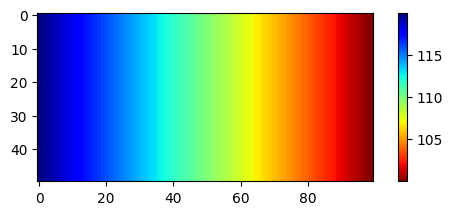

In [18]:
import matplotlib.pyplot as plt

heads = engine.read_flow_head(idx=0, layer=0)
plt.subplot(2, 1, 1)
plt.imshow(heads, cmap='jet_r')
plt.colorbar()
plt.show()